<img src=https://i.ytimg.com/vi/knxlmCVFAZI/maxresdefault.jpg>

In [ ]:
#!pip3 install twilio

In [2]:
import os
from twilio.rest import Client
from twilio_config import *
import time

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


import pandas as pd
import requests
from bs4  import BeautifulSoup
from tqdm import tqdm

from datetime import datetime


# Armado de la URL

In [3]:
query = 'Concepción'
api_key = API_KEY_WAPI

url_clima = 'http://api.weatherapi.com/v1/forecast.json?key='+api_key+'&q='+query+'&days=1&aqi=no&alerts=no'
url_clima

'http://api.weatherapi.com/v1/forecast.json?key=2271dd89e6e14edaace173055230707&q=Concepción&days=1&aqi=no&alerts=no'

In [4]:
response = requests.get(url_clima).json()

In [5]:
response

{'location': {'name': 'Concepción',
  'region': 'Bio-Bio',
  'country': 'Chili',
  'lat': -36.83,
  'lon': -73.05,
  'tz_id': 'America/Santiago',
  'localtime_epoch': 1722959163,
  'localtime': '2024-08-06 11:46'},
 'current': {'last_updated_epoch': 1722959100,
  'last_updated': '2024-08-06 11:45',
  'temp_c': 8.1,
  'temp_f': 46.5,
  'is_day': 1,
  'condition': {'text': 'Light rain shower',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/353.png',
   'code': 1240},
  'wind_mph': 4.3,
  'wind_kph': 6.8,
  'wind_degree': 313,
  'wind_dir': 'NW',
  'pressure_mb': 1028.0,
  'pressure_in': 30.35,
  'precip_mm': 0.33,
  'precip_in': 0.01,
  'humidity': 78,
  'cloud': 97,
  'feelslike_c': 7.0,
  'feelslike_f': 44.7,
  'windchill_c': 7.0,
  'windchill_f': 44.7,
  'heatindex_c': 8.1,
  'heatindex_f': 46.5,
  'dewpoint_c': 4.4,
  'dewpoint_f': 40.0,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 3.0,
  'gust_mph': 5.8,
  'gust_kph': 9.4},
 'forecast': {'forecastday': [{'date': '2024-08-06',
 

In [6]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [7]:
response['forecast']

{'forecastday': [{'date': '2024-08-06',
   'date_epoch': 1722902400,
   'day': {'maxtemp_c': 8.9,
    'maxtemp_f': 48.1,
    'mintemp_c': 4.9,
    'mintemp_f': 40.8,
    'avgtemp_c': 6.7,
    'avgtemp_f': 44.1,
    'maxwind_mph': 6.7,
    'maxwind_kph': 10.8,
    'totalprecip_mm': 1.73,
    'totalprecip_in': 0.07,
    'totalsnow_cm': 0.0,
    'avgvis_km': 9.4,
    'avgvis_miles': 5.0,
    'avghumidity': 83,
    'daily_will_it_rain': 1,
    'daily_chance_of_rain': 92,
    'daily_will_it_snow': 0,
    'daily_chance_of_snow': 0,
    'condition': {'text': 'Patchy rain nearby',
     'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png',
     'code': 1063},
    'uv': 3.0},
   'astro': {'sunrise': '07:45 AM',
    'sunset': '06:11 PM',
    'moonrise': '09:06 AM',
    'moonset': '08:25 PM',
    'moon_phase': 'Waxing Crescent',
    'moon_illumination': 2,
    'is_moon_up': 0,
    'is_sun_up': 0},
   'hour': [{'time_epoch': 1722916800,
     'time': '2024-08-06 00:00',
     'temp_c': 6.2,
     

In [8]:
response['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

In [9]:
len(response['forecast']['forecastday'][0]['hour'])

24

In [10]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1722916800,
 'time': '2024-08-06 00:00',
 'temp_c': 6.2,
 'temp_f': 43.1,
 'is_day': 0,
 'condition': {'text': 'Partly Cloudy ',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
  'code': 1003},
 'wind_mph': 1.8,
 'wind_kph': 2.9,
 'wind_degree': 159,
 'wind_dir': 'SSE',
 'pressure_mb': 1024.0,
 'pressure_in': 30.24,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 88,
 'cloud': 31,
 'feelslike_c': 6.2,
 'feelslike_f': 43.1,
 'windchill_c': 6.2,
 'windchill_f': 43.1,
 'heatindex_c': 6.2,
 'heatindex_f': 43.1,
 'dewpoint_c': 4.4,
 'dewpoint_f': 40.0,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 3.1,
 'gust_kph': 5.0,
 'uv': 0}

In [11]:
response['forecast']['forecastday'][0]['hour'][0]['time'].split()[0]

'2024-08-06'

In [12]:
response['forecast']['forecastday'][0]['hour'][1]['time']

'2024-08-06 01:00'

In [13]:
int(response['forecast']['forecastday'][0]['hour'][1]['time'].split()[1].split(':')[0])

1

In [14]:
response['forecast']['forecastday'][0]['hour'][0]['condition']['text'] #Condition

'Partly Cloudy '

In [15]:
response['forecast']['forecastday'][0]['hour'][0]['temp_c'] # Temperature

6.2

In [16]:
response['forecast']['forecastday'][0]['hour'][0]['will_it_rain']

0

In [17]:
response['forecast']['forecastday'][0]['hour'][2]['chance_of_rain']

1

# Dataframe - Explo

In [18]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [19]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1722916800,
 'time': '2024-08-06 00:00',
 'temp_c': 6.2,
 'temp_f': 43.1,
 'is_day': 0,
 'condition': {'text': 'Partly Cloudy ',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
  'code': 1003},
 'wind_mph': 1.8,
 'wind_kph': 2.9,
 'wind_degree': 159,
 'wind_dir': 'SSE',
 'pressure_mb': 1024.0,
 'pressure_in': 30.24,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 88,
 'cloud': 31,
 'feelslike_c': 6.2,
 'feelslike_f': 43.1,
 'windchill_c': 6.2,
 'windchill_f': 43.1,
 'heatindex_c': 6.2,
 'heatindex_f': 43.1,
 'dewpoint_c': 4.4,
 'dewpoint_f': 40.0,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 3.1,
 'gust_kph': 5.0,
 'uv': 0}

Fecha

In [20]:
i = 0
fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
fecha

'2024-08-06'

Hora

In [21]:
hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
hora

0

Condicion (lluvia/no lluvia)

In [22]:
condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
condicion

'Partly Cloudy '

Temperatura

In [25]:
temperatura = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
temperatura

6.2

LLuvia - Will it rain (0/1)

In [24]:
lluvia = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
print(lluvia)
prob_lluvia = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
print(prob_lluvia)

0
0


In [25]:
del(i)

# Dataframe - Explo

In [28]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [48]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1722830400,
 'time': '2024-08-05 00:00',
 'temp_c': 10.2,
 'temp_f': 50.4,
 'is_day': 0,
 'condition': {'text': 'Moderate rain',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/302.png',
  'code': 1189},
 'wind_mph': 17.7,
 'wind_kph': 28.4,
 'wind_degree': 357,
 'wind_dir': 'N',
 'pressure_mb': 1012.0,
 'pressure_in': 29.89,
 'precip_mm': 6.11,
 'precip_in': 0.24,
 'snow_cm': 0.0,
 'humidity': 94,
 'cloud': 100,
 'feelslike_c': 7.0,
 'feelslike_f': 44.5,
 'windchill_c': 7.0,
 'windchill_f': 44.5,
 'heatindex_c': 10.2,
 'heatindex_f': 50.4,
 'dewpoint_c': 9.2,
 'dewpoint_f': 48.6,
 'will_it_rain': 1,
 'chance_of_rain': 100,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 7.0,
 'vis_miles': 4.0,
 'gust_mph': 26.9,
 'gust_kph': 43.3,
 'uv': 0}

Fecha

In [43]:
i = 0
fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
fecha

'2024-08-05'

Hora

In [46]:
hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
hora

0

Condicion (lluvia/no lluvia)

In [52]:
condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
condicion

'Moderate rain'

Temperatura

In [56]:
temperatura = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
temperatura

10.2

LLuvia - Will it rain (0/1)

In [59]:
lluvia = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
print(lluvia)
prob_lluvia = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
print(prob_lluvia)

1
100


In [62]:
del(i)

# Dataframe

In [26]:
def get_forecast(response,i):
    
    fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
    hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
    condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
    tempe = float(response['forecast']['forecastday'][0]['hour'][i]['temp_c'])
    rain = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
    prob_rain = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
    
    return fecha,hora,condicion,tempe,rain,prob_rain

In [27]:
datos = []

for i in tqdm(range(len(response['forecast']['forecastday'][0]['hour'])),colour = 'green'):
    
    datos.append(get_forecast(response,i))
    

100%|██████████| 24/24 [00:00<00:00, 187454.93it/s]


In [28]:
datos

[('2024-08-06', 0, 'Partly Cloudy ', 6.2, 0, 0),
 ('2024-08-06', 1, 'Partly Cloudy ', 6.0, 0, 0),
 ('2024-08-06', 2, 'Partly Cloudy ', 5.9, 0, 0),
 ('2024-08-06', 3, 'Patchy rain nearby', 5.7, 1, 71),
 ('2024-08-06', 4, 'Patchy rain nearby', 5.5, 0, 61),
 ('2024-08-06', 5, 'Patchy rain nearby', 5.6, 1, 80),
 ('2024-08-06', 6, 'Patchy rain nearby', 5.8, 0, 60),
 ('2024-08-06', 7, 'Clear ', 5.8, 0, 0),
 ('2024-08-06', 8, 'Sunny', 5.5, 0, 0),
 ('2024-08-06', 9, 'Patchy rain nearby', 6.4, 0, 65),
 ('2024-08-06', 10, 'Patchy rain nearby', 7.8, 1, 100),
 ('2024-08-06', 11, 'Light rain shower', 8.1, 1, 100),
 ('2024-08-06', 12, 'Light drizzle', 8.0, 1, 100),
 ('2024-08-06', 13, 'Patchy rain nearby', 8.4, 1, 100),
 ('2024-08-06', 14, 'Patchy light drizzle', 8.9, 1, 100),
 ('2024-08-06', 15, 'Patchy rain nearby', 8.9, 1, 100),
 ('2024-08-06', 16, 'Patchy rain nearby', 8.7, 1, 100),
 ('2024-08-06', 17, 'Patchy rain nearby', 8.5, 1, 100),
 ('2024-08-06', 18, 'Patchy rain nearby', 7.4, 0, 65),
 ('

In [29]:
datos[0]

('2024-08-06', 0, 'Partly Cloudy ', 6.2, 0, 0)

In [30]:
col = ['Fecha','Hora','Condicion','Temperatura','Lluvia','prob_lluvia']
df = pd.DataFrame(datos,columns=col)
df = df.sort_values(by = 'Hora',ascending = True)
df

Fecha  Hora             Condicion  Temperatura  Lluvia  prob_lluvia
0   2024-08-06     0        Partly Cloudy           6.2       0            0
1   2024-08-06     1        Partly Cloudy           6.0       0            0
2   2024-08-06     2        Partly Cloudy           5.9       0            0
3   2024-08-06     3    Patchy rain nearby          5.7       1           71
4   2024-08-06     4    Patchy rain nearby          5.5       0           61
5   2024-08-06     5    Patchy rain nearby          5.6       1           80
6   2024-08-06     6    Patchy rain nearby          5.8       0           60
7   2024-08-06     7                Clear           5.8       0            0
8   2024-08-06     8                 Sunny          5.5       0            0
9   2024-08-06     9    Patchy rain nearby          6.4       0           65
10  2024-08-06    10    Patchy rain nearby          7.8       1          100
11  2024-08-06    11     Light rain shower          8.1       1          100
12  2024-08-06    12         Light drizzle          8.0       1          100
13  2024-08-06    13    Patchy rain nearby          8.4       1          100
14  2024-08-06    14  Patchy light drizzle          8.9       1          100
15  2024-08-06    15    Patchy rain nearby          8.9       1          100
16  2024-08-06    16    Patchy rain nearby          8.7       1          100
17  2024-08-06    17    Patchy rain nearby          8.5       1          100
18  2024-08-06    18    Patchy rain nearby          7.4       0           65
19  2024-08-06    19    Patchy rain nearby          6.6       1          100
20  2024-08-06    20    Patchy rain nearby          6.3       1           87
21  2024-08-06    21        Partly Cloudy           5.8       0            0
22  2024-08-06    22                Clear           5.3       0            0
23  2024-08-06    23                Clear           4.9       0            0

In [31]:
# data_cli = {
#     'Fecha':datos[0][0],
#     'Hora':datos[1][],
#     'Tiempo':condicion,
#     'Temperatura':tempe,
#     'LLoverá':rain,
#     'prob_lluvia':prob_rain
    
# }

# df = pd.DataFrame(data_cli)
# df = df.sort_values(by = 'Hora',ascending = True)

In [32]:
df[df['Lluvia']==1]

,Fecha,Hora,Condicion,Temperatura,Lluvia,prob_lluvia
3,2024-08-06,3,Patchy rain nearby,5.7,1,71
5,2024-08-06,5,Patchy rain nearby,5.6,1,80
10,2024-08-06,10,Patchy rain nearby,7.8,1,100
11,2024-08-06,11,Light rain shower,8.1,1,100
12,2024-08-06,12,Light drizzle,8.0,1,100
13,2024-08-06,13,Patchy rain nearby,8.4,1,100
14,2024-08-06,14,Patchy light drizzle,8.9,1,100
15,2024-08-06,15,Patchy rain nearby,8.9,1,100
16,2024-08-06,16,Patchy rain nearby,8.7,1,100
17,2024-08-06,17,Patchy rain nearby,8.5,1,100


In [33]:
df_rain =  df[(df['Lluvia']==1) & (df['Hora']>6) & (df['Hora']< 22)]
df_rain = df_rain[['Hora','Condicion']]
df_rain.set_index('Hora', inplace = True)

In [34]:
df['Fecha'][0]

'2024-08-06'

In [35]:
df_rain

,Condicion
Hora,
10,Patchy rain nearby
11,Light rain shower
12,Light drizzle
13,Patchy rain nearby
14,Patchy light drizzle
15,Patchy rain nearby
16,Patchy rain nearby
17,Patchy rain nearby
19,Patchy rain nearby


# Mensaje Template

In [35]:
'\nHola! \n\n\n El pronostico del tiempo hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain)

'\nHola! \n\n\n El pronostico del tiempo hoy 2024-08-05 en Concepción es : \n\n\n                Condicion\nHora                    \n7     Patchy rain nearby\n8     Patchy rain nearby\n9      Light rain shower\n10     Light rain shower\n11     Light rain shower\n12    Patchy rain nearby\n13    Patchy rain nearby\n14    Patchy rain nearby\n15    Patchy rain nearby'

In [36]:
PHONE_NUMBER

'+1 619 568 5691'

# Mensaje SMS desde Twilio

https://www.twilio.com/docs/messaging/quickstart/python

In [80]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\n\n\n Hola! \n\n\n El pronostico de lluvia hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain),
                     from_=PHONE_NUMBER,
                     to='+56982091549'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SMb70c823f6e29f97cc9ea85691d5d4116


# Challenge 

* Extrae el valor del dolar en tu país y el top 10 de criptomonedas con su respectiva valoración
* Ahora envia un mensaje diarío a tu Whatsapp usando Twilio

**hint 💡** Investiga que API's gratuitas existen para consultar estos datos



<img src="WhatsApp Image 2022-09-13 at 9.12.18 AM.jpeg" width="200" height="200" />

In [36]:
import pysurfline

# spotId Buchupureo
spotId = "640a4d90e92030fa8aa15c69"

spotforecasts = pysurfline.get_spot_forecasts(
    spotId,
    days=4,
    intervalHours=3,
)

df = spotforecasts.get_dataframe()

In [37]:
df.head()

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
0,2024-08-06 04:00:00,1722916800,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,2.43521,...,0.00,0,6.86253,110.99713,Cross-shore,6.86253,2,7.03853,NIGHT_CLEAR,1024
1,2024-08-06 07:00:00,1722927600,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,2.33158,...,0.00,0,5.44467,109.62555,Offshore,5.44467,2,6.75002,NIGHT_BRIEF_SHOWERS_POSSIBLE,1025
2,2024-08-06 10:00:00,1722938400,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,2.19687,...,0.00,0,4.49814,82.04128,Offshore,4.49814,2,6.69861,NIGHT_BRIEF_SHOWERS_POSSIBLE,1026
3,2024-08-06 13:00:00,1722949200,100.0,-4,1.8,2.4,2,False,Overhead to well overhead,1.96889,...,0.00,0,4.87864,129.72255,Cross-shore,5.79426,2,7.76943,CLEAR,1028
4,2024-08-06 16:00:00,1722960000,100.0,-4,1.5,2.1,2,False,Head to 0.6m overhead,1.89635,...,253.18,0,7.77657,279.71257,Onshore,7.77657,2,8.74956,CLEAR,1028


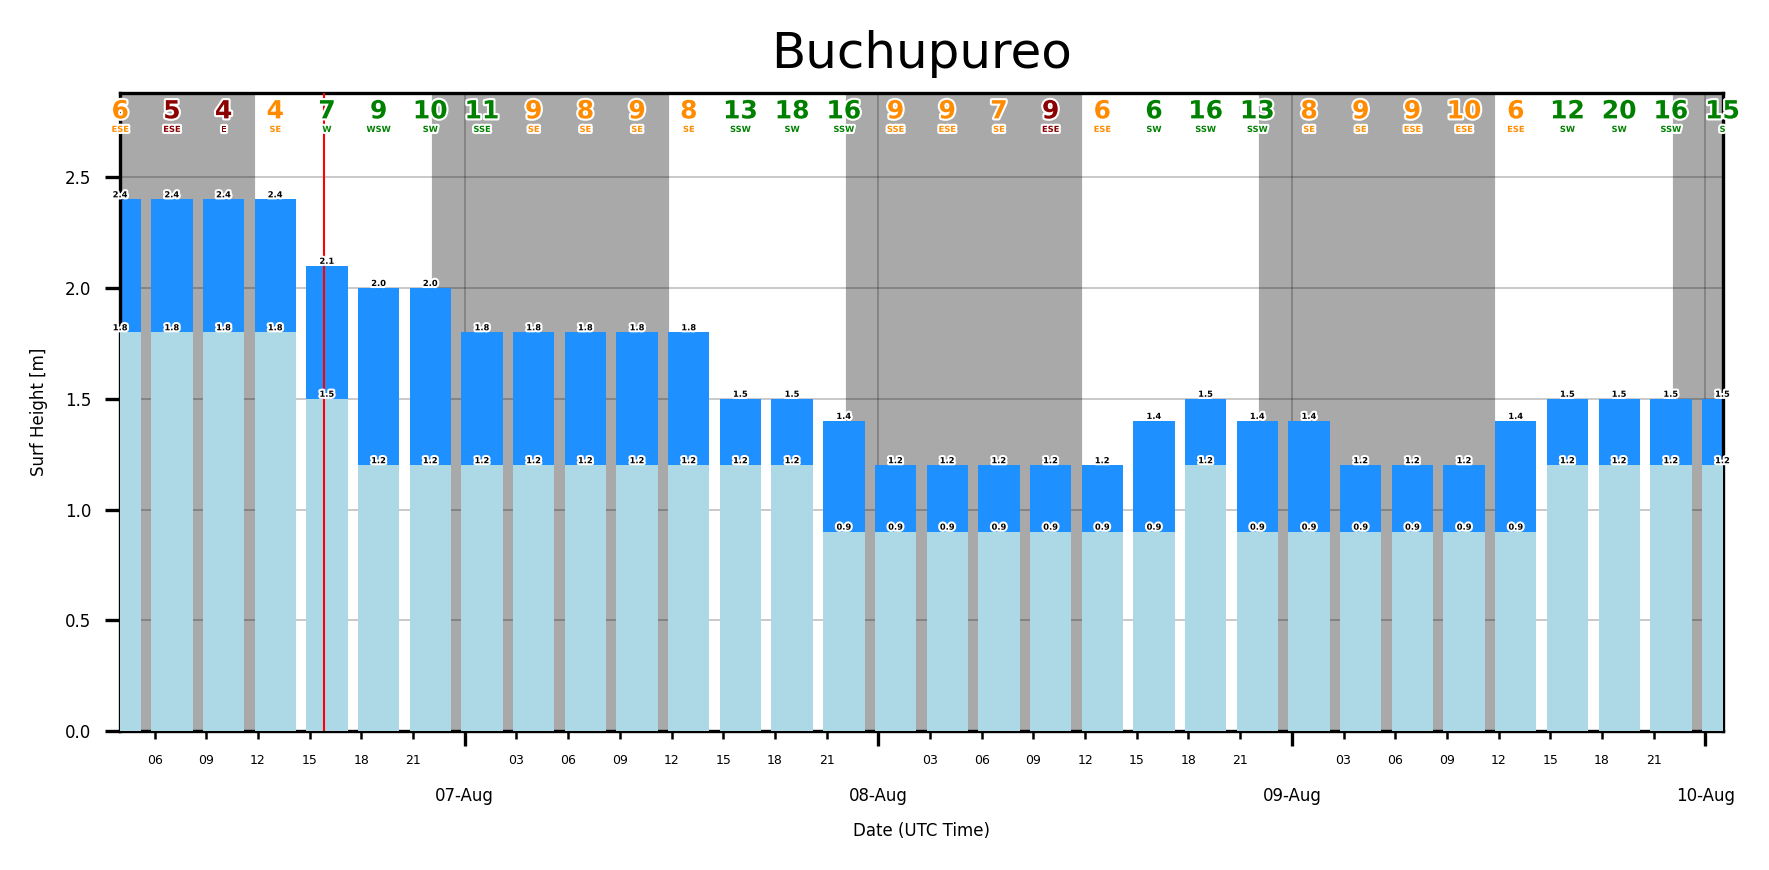

In [38]:
pysurfline.plot_surf_report(
    spotforecasts,
    barLabels=True,
    wind = True
)

In [39]:
#Condiciones
wind = 'Offshore'
max_height = 2.5
min_height = 2
sunrise = 8
sunset = 18

In [78]:

df_sesh = df[
    (df['surf_max'] <= max_height) & (df['surf_max'] >= min_height) &
    (df['timestamp_dt'].dt.hour <= sunset) & (df['timestamp_dt'].dt.hour >= sunrise) &
    (df['directionType'] != wind)
].copy()


In [79]:

df_sesh['date'] = df_sesh['timestamp_dt'].dt.date
df_sesh['hour'] = df_sesh['timestamp_dt'].dt.hour


In [81]:
df_sms = df_sesh[['hour', 'surf_max', 'directionType']]
df_sms

,hour,surf_max,directionType
3,13,2.4,Cross-shore
4,16,2.1,Onshore


In [82]:
sms = df_sms.to_string(index=False)

In [85]:
def wave_sms(df, wind, max_height, min_height, sunrise, sunset):

    # Comparar condiciones
    df_sesh = df[
        (df['surf_max'] <= max_height) & (df['surf_max'] >= min_height) &
        (df['timestamp_dt'].dt.hour <= sunset) & (df['timestamp_dt'].dt.hour >= sunrise) &
        (df['directionType'] != wind)
    ].copy()

    df_sesh['date'] = df_sesh['timestamp_dt'].dt.date
    df_sesh['hour'] = df_sesh['timestamp_dt'].dt.hour

    # Data para el sms
    df_sms = df_sesh[['hour', 'surf_max', 'directionType']]

    # SMS a string
    sms = df_sms.to_string(index=False)

    return sms


# Mensaje Twilio

In [88]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\nHola! \n\n\n Hoy puede salir ola en Buchu.' + wave_sms(df, wind, max_height, min_height, sunrise, sunset),
                     from_=PHONE_NUMBER,
                     to='+56982091549'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SMe1c837fa922fd13167a93c68507fb82e
